# <center>  Classifying iris species 

This application is from the book [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)

## Introduction

A hobby botanist is interested in distinguishing what the species is of
some iris flowers that she found. She has collected some measurements associated
with the iris: the ** length and width of the petals **, and the ** length and width of the sepal**,
all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species ** Setosa**, **Versicolor** or **Virginica**. For
these measurements, she can be certain of which species each iris belongs to. Let’s
assume that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

## Meet the data

The data we will use for this example is the iris dataset, a classical dataset in machine
learning and statistics.
It is included in scikit-learn in the dataset module. We can load it by calling the
load_iris function:

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The value to the key **DESCR** is a short description of the dataset.

The value with key **target_names** is an array of strings, containing the species of
flower that we want to predict:


In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

The **feature_names** are a list of strings, giving the description of each feature:

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the **target** and **data** fields. The data contains the
numeric measurements of sepal length, sepal width, petal length, and petal width in a
numpy array

The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [5]:
iris['data'].shape

(150, 4)

We have 150 samples and 4 features.
The shape of the data array is the number of samples times the number of features.
This is a convention in scikit-learn, and your data will always be assumed to be in this
shape.

The target array contains the species of each of the flowers that were measured, also
as a numpy array.The target is a one-dimensional array, with one entry per flower

In [6]:
iris['target'].shape

(150,)

The species are encoded as integers from 0 to 2 (whose names are given by target_names):

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Measuring Success: Training and testing data

Scikit-learn contains **train_test_split** function that shuffles the dataset and splits it to train set and test set.
This function extracts 75% of the rows in the data as the training set, together with
the corresponding labels for this data. The remaining 25% of the data, together with
the remaining labels are declared as the test set.

In scikit-learn, data is usually denoted with a capital **X** , while labels are denoted by a
lower-case **y** .

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris['data'], iris['target'], random_state=0)

The train_test_split function shuffles the dataset using a pseudo random number
generator before making the split. To make sure that we will get the same output if we run the same function several
times, we provide the pseudo random number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome.

In [9]:
print('the size of the training set is:', X_train.shape)
print('the size of the test set is:', X_test.shape)

the size of the training set is: (112, 4)
the size of the test set is: (38, 4)


## First things first: Look at your data

Before building a machine learning model, it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot.

Unfortunately, computer screens have only two dimensions, which allows us to only
plot two (or maybe three) features at a time. It is difficult to plot datasets with more
than three features this way.
One way around this problem is to do a pair plot, which looks at all pairs of two features. If you have a small number of features, such as the four we have here, this is
quite reasonable. You should keep in mind that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be
revealed when visualizing it this way.

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

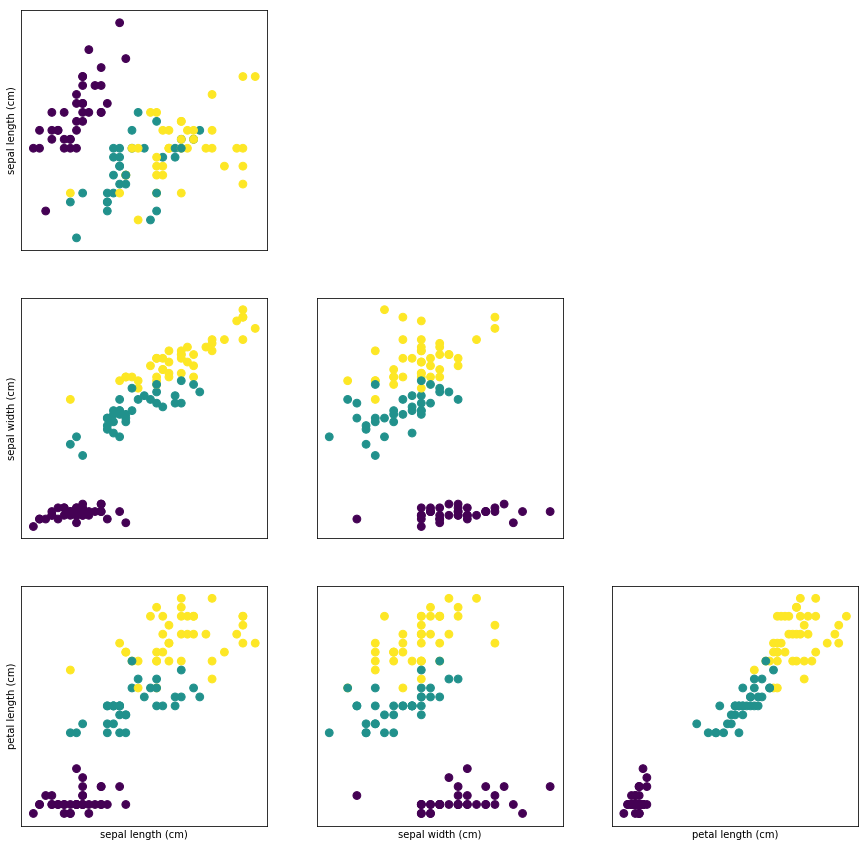

In [11]:
fig, ax=plt.subplots(3,3,figsize=(15,15))
plt.suptitle="iris_pairplot"
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,(i+1)],c=y_train, s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if j>i:
            ax[i,j].set_visible(False)
        if j==0:
            ax[i,j].set_ylabel(iris['feature_names'][i])
        if i==2:
            ax[i,j].set_xlabel(iris['feature_names'][j])

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

## Building the model: k nearest neighbors

Building this model only consists of storing the training set. To make a prediction for
a new data point, the algorithm finds the K points in the training set that are closest to the
new point.Then, we can make a prediction using the majority class among these neighbors.

Let’s use only a single neighbor for now.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Making predictions

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of
2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would
this be?
We can put this data into a numpy array, again with the shape number of samples
(one) times number of features (four):

In [21]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [22]:
prediction=knn.predict(X_new)
prediction

array([0])

In [23]:
iris['target_names'][prediction]

array(['setosa'],
      dtype='<U10')

## Evaluating the model

We can make a prediction for an iris in the test data, and compare it against its label
(the known species). We can measure how well the model works by computing the
accuracy, which is the fraction of flowers for which the right species was predicted:

In [24]:
y_pred=knn.predict(X_test)
np.mean(y_test==y_pred)

0.97368421052631582

We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [26]:
knn.score(X_test, y_test)

0.97368421052631582

For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assump‐
tions, this means that we can expect our model to be correct 97% of the time for new
irises.